In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
combined_data = pd.read_csv('combined.csv')

In [3]:
combined_data.head()

,brand_uuid,id,full_name,company_slug,slug,email,job_title,location,is_c_level,working_since,...,founded,employees_count,generic_reseller,store_is_subdomain,product_prices_mean,product_prices_max,product_prices_min,cred_1_growth_score_max,cred_2_growth_score_mean,time_worked
0,motorola,2015583,Michaël Maarek,motorola-mobility,michaelmaarek,lemike10@gmail.com,Key Account Director,"London, United Kingdom",0.0,2014-08-01 00:00:00+00:00,...,2017.0,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,40.933333,853 days 00:00:00.000000000
1,motorola,2048222,Michael Roberts,motorola-mobility,michaelroberts07,msajs.roberts@gmail.com,Sr. Director of Product Strategy and Business ...,Greater San Diego Area,0.0,2010-08-01 00:00:00+00:00,...,2017.0,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,31.882950,731 days 00:00:00.000000000
2,motorola,60552,Pratod Kasbekar,motorola-mobility,pratod-kasbekar-a088b64,pkasbekar@verizon.net,Senior Director of Program Management/Engineering,United States,0.0,2006-01-01 00:00:00+00:00,...,2017.0,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,63.765900,5265 days 16:25:25.000000000
3,motorola,60545,Pamela Ajaibela,motorola-mobility,pamelaajaibela,pamelapajaibela@gmail.com,Director,San Francisco Bay Area,0.0,2007-02-01 00:00:00+00:00,...,2017.0,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,63.765900,4869 days 16:25:25.000000000
4,motorola,60546,paul burnett,NaN,paul-burnett-73189b23,pburnett66@rogers.com,Channel Director,Canada,0.0,1970-01-01 00:00:00.000002017+00:00,...,2017.0,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,63.765900,18414 days 16:25:24.999997983


In [22]:
combined_data.shape

(1552472, 28)

In [4]:
combined_data.columns #columns in the dataframe

Index(['brand_uuid', 'id', 'full_name', 'company_slug', 'slug', 'email',
       'job_title', 'location', 'is_c_level', 'working_since', 'working_until',
       'is_current', 'brand_id', 'brand_name', 'growth_score',
       'sudden_growth_score', 'sudden_growth_delta', 'acceleration_score',
       'success_score', 'is_physical_products_brand', 'is_brickandmortar',
       'founded', 'employees_count', 'generic_reseller', 'store_is_subdomain',
       'product_prices_mean', 'product_prices_max', 'product_prices_min',
       'cred_1_growth_score_max', 'cred_2_growth_score_mean', 'time_worked'],
      dtype='object')

In [5]:
#number of unique full names, slugs, email in the dataframe to choose which would be best to group by
print('Number of unique names: ', combined_data['full_name'].nunique())
print('Number of unique slugs (from LinkedIn): ', combined_data['slug'].nunique())
print('Number of unique email ids: ', combined_data['email'].nunique())

Number of unique names:  1347616
Number of unique slugs (from LinkedIn):  1459704
Number of unique email ids:  592383


In [6]:
#number of null valuesin names, slugs (not considering email anymore, since we seem to have very less data in that column)
print('Null values in full name is ', combined_data['full_name'].isna().sum())
print('Null values in slug is ', combined_data['slug'].isna().sum())

Null values in full name is  0
Null values in slug is  0


In [7]:
#Drop the rows with null value in the 'slug column', check the null values and unique values again
combined_data.dropna(subset=['slug'], inplace=True)
#combined_data = combined_data[combined_data['slug'].notnull()]
print('Null values in slug is ', combined_data['slug'].isna().sum())
print('Number of unique slugs (from LinkedIn): ', combined_data['slug'].nunique())

Null values in slug is  0
Number of unique slugs (from LinkedIn):  1459704


In [27]:
combined_data.shape

(1546517, 28)

In [8]:
group_by_slug = combined_data.groupby('slug')

In [9]:
group_by_slug

In [30]:
group_by_slug.growth_score.agg(['max', 'mean'])

,max,mean
slug,,
%25C3%25A0dam-balmas-0b012618,4.0894,1.45715
%25C3%25A1d%25C3%25A1m-rudolf-21795096,53.8800,53.88000
%25C3%25A1ine-breen-18944844,1.6584,1.65840
%25C3%25A1lvaro-gonz%25C3%25A1lez-6b57a031,67.9460,43.18946
%25C3%25A1lvaro-guiti%25C3%25A1n-le%25C3%25B3n-86a5832a,29.4717,29.47170
...,...,...
🤩-david-👉-wojcik-🚀-67b209ab,-6.0418,-6.04180
🦅john-beamson-🦅-8b9440161,-0.4931,-0.49310
🦋v-k🦋-8532a3198,16.3732,16.37320


In [10]:
#In this in one go, we computed the max growth score (max of all growth scores associated to a person) as the first option of credibility score, 
combined_data['cred_1_growth_score_max'] = group_by_slug['growth_score'].transform('max')
combined_data.head()

,brand_uuid,id,full_name,company_slug,slug,email,job_title,location,is_c_level,working_since,...,founded,employees_count,generic_reseller,store_is_subdomain,product_prices_mean,product_prices_max,product_prices_min,cred_1_growth_score_max,cred_2_growth_score_mean,time_worked
0,motorola,2015583,Michaël Maarek,motorola-mobility,michaelmaarek,lemike10@gmail.com,Key Account Director,"London, United Kingdom",0.0,2014-08-01 00:00:00+00:00,...,2017.0,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,40.933333,853 days 00:00:00.000000000
1,motorola,2048222,Michael Roberts,motorola-mobility,michaelroberts07,msajs.roberts@gmail.com,Sr. Director of Product Strategy and Business ...,Greater San Diego Area,0.0,2010-08-01 00:00:00+00:00,...,2017.0,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,31.882950,731 days 00:00:00.000000000
2,motorola,60552,Pratod Kasbekar,motorola-mobility,pratod-kasbekar-a088b64,pkasbekar@verizon.net,Senior Director of Program Management/Engineering,United States,0.0,2006-01-01 00:00:00+00:00,...,2017.0,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,63.765900,5265 days 16:25:25.000000000
3,motorola,60545,Pamela Ajaibela,motorola-mobility,pamelaajaibela,pamelapajaibela@gmail.com,Director,San Francisco Bay Area,0.0,2007-02-01 00:00:00+00:00,...,2017.0,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,63.765900,4869 days 16:25:25.000000000
4,motorola,60546,paul burnett,NaN,paul-burnett-73189b23,pburnett66@rogers.com,Channel Director,Canada,0.0,1970-01-01 00:00:00.000002017+00:00,...,2017.0,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,63.765900,18414 days 16:25:24.999997983


In [11]:
#do the same thing as before but now setting cred score to be the mean of the growth scores
combined_data['cred_2_growth_score_mean'] = group_by_slug['growth_score'].transform('mean')
combined_data.head()

,brand_uuid,id,full_name,company_slug,slug,email,job_title,location,is_c_level,working_since,...,founded,employees_count,generic_reseller,store_is_subdomain,product_prices_mean,product_prices_max,product_prices_min,cred_1_growth_score_max,cred_2_growth_score_mean,time_worked
0,motorola,2015583,Michaël Maarek,motorola-mobility,michaelmaarek,lemike10@gmail.com,Key Account Director,"London, United Kingdom",0.0,2014-08-01 00:00:00+00:00,...,2017.0,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,40.933333,853 days 00:00:00.000000000
1,motorola,2048222,Michael Roberts,motorola-mobility,michaelroberts07,msajs.roberts@gmail.com,Sr. Director of Product Strategy and Business ...,Greater San Diego Area,0.0,2010-08-01 00:00:00+00:00,...,2017.0,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,31.882950,731 days 00:00:00.000000000
2,motorola,60552,Pratod Kasbekar,motorola-mobility,pratod-kasbekar-a088b64,pkasbekar@verizon.net,Senior Director of Program Management/Engineering,United States,0.0,2006-01-01 00:00:00+00:00,...,2017.0,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,63.765900,5265 days 16:25:25.000000000
3,motorola,60545,Pamela Ajaibela,motorola-mobility,pamelaajaibela,pamelapajaibela@gmail.com,Director,San Francisco Bay Area,0.0,2007-02-01 00:00:00+00:00,...,2017.0,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,63.765900,4869 days 16:25:25.000000000
4,motorola,60546,paul burnett,NaN,paul-burnett-73189b23,pburnett66@rogers.com,Channel Director,Canada,0.0,1970-01-01 00:00:00.000002017+00:00,...,2017.0,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,63.765900,18414 days 16:25:24.999997983


In [34]:
#want to check number of unique job titles, this is to check if we can afford converting them to categorical variables
print('Number of unique job titles is ', combined_data['job_title'].nunique())

Number of unique job titles is  714331


<Figure size 1440x1440 with 0 Axes>

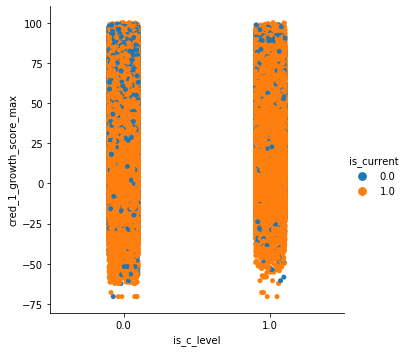

In [53]:
plt.figure(figsize=(20,20))
sns.catplot(x="is_c_level", y="cred_1_growth_score_max", data=combined_data, hue = 'is_current')

In [12]:
#filling in the working_since column
combined_data.loc[((combined_data['working_since'].isnull()) & (combined_data['is_current'] == True)), 'working_since'] = combined_data['founded'] 

In [37]:
combined_data.isnull().sum()

brand_uuid                        484
id                                  0
full_name                           0
company_slug                   637537
slug                                0
email                          898656
job_title                          74
location                       135788
is_c_level                          0
working_since                   11925
working_until                       0
is_current                          0
brand_id                            0
brand_name                         35
growth_score                        0
sudden_growth_score                 0
sudden_growth_delta                 0
acceleration_score                  0
success_score                       0
is_physical_products_brand        355
is_brickandmortar                 486
founded                         32661
employees_count                961897
generic_reseller                    0
store_is_subdomain                  0
product_prices_mean           1265129
product_pric

In [14]:
#convert both working_since and working_until to date time format
combined_data['working_since'] = pd.to_datetime(combined_data['working_since'], utc = True)

In [15]:
combined_data['working_until'] = pd.to_datetime(combined_data['working_until'], utc = True)

In [16]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1546517 entries, 0 to 1546516
Data columns (total 31 columns):
brand_uuid                    1546033 non-null object
id                            1546517 non-null int64
full_name                     1546517 non-null object
company_slug                  908980 non-null object
slug                          1546517 non-null object
email                         647861 non-null object
job_title                     1546443 non-null object
location                      1410729 non-null object
is_c_level                    1546517 non-null float64
working_since                 1534592 non-null datetime64[ns, UTC]
working_until                 1546517 non-null datetime64[ns, UTC]
is_current                    1546517 non-null float64
brand_id                      1546517 non-null int64
brand_name                    1546482 non-null object
growth_score                  1546517 non-null float64
sudden_growth_score           1546517 non-null float

In [17]:
combined_data['time_worked'] = combined_data['working_until'] - combined_data['working_since']

In [18]:
combined_data['days_worked'] = combined_data['time_worked'].dt.days

In [19]:
combined_data.head()

,brand_uuid,id,full_name,company_slug,slug,email,job_title,location,is_c_level,working_since,...,employees_count,generic_reseller,store_is_subdomain,product_prices_mean,product_prices_max,product_prices_min,cred_1_growth_score_max,cred_2_growth_score_mean,time_worked,days_worked
0,motorola,2015583,Michaël Maarek,motorola-mobility,michaelmaarek,lemike10@gmail.com,Key Account Director,"London, United Kingdom",0.0,2014-08-01 00:00:00+00:00,...,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,40.933333,853 days 00:00:00,853.0
1,motorola,2048222,Michael Roberts,motorola-mobility,michaelroberts07,msajs.roberts@gmail.com,Sr. Director of Product Strategy and Business ...,Greater San Diego Area,0.0,2010-08-01 00:00:00+00:00,...,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,31.882950,731 days 00:00:00,731.0
2,motorola,60552,Pratod Kasbekar,motorola-mobility,pratod-kasbekar-a088b64,pkasbekar@verizon.net,Senior Director of Program Management/Engineering,United States,0.0,2006-01-01 00:00:00+00:00,...,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,63.765900,5265 days 16:25:25,5265.0
3,motorola,60545,Pamela Ajaibela,motorola-mobility,pamelaajaibela,pamelapajaibela@gmail.com,Director,San Francisco Bay Area,0.0,2007-02-01 00:00:00+00:00,...,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,63.765900,4869 days 16:25:25,4869.0
4,motorola,60546,paul burnett,NaN,paul-burnett-73189b23,pburnett66@rogers.com,Channel Director,Canada,0.0,1970-01-01 00:00:00.000002017+00:00,...,26954.0,0.0,0.0,NaN,NaN,NaN,63.7659,63.765900,18414 days 16:25:24.999997,18414.0


In [20]:
combined_data.columns

Index(['brand_uuid', 'id', 'full_name', 'company_slug', 'slug', 'email',
       'job_title', 'location', 'is_c_level', 'working_since', 'working_until',
       'is_current', 'brand_id', 'brand_name', 'growth_score',
       'sudden_growth_score', 'sudden_growth_delta', 'acceleration_score',
       'success_score', 'is_physical_products_brand', 'is_brickandmortar',
       'founded', 'employees_count', 'generic_reseller', 'store_is_subdomain',
       'product_prices_mean', 'product_prices_max', 'product_prices_min',
       'cred_1_growth_score_max', 'cred_2_growth_score_mean', 'time_worked',
       'days_worked'],
      dtype='object')

In [22]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1546517 entries, 0 to 1546516
Data columns (total 32 columns):
brand_uuid                    1546033 non-null object
id                            1546517 non-null int64
full_name                     1546517 non-null object
company_slug                  908980 non-null object
slug                          1546517 non-null object
email                         647861 non-null object
job_title                     1546443 non-null object
location                      1410729 non-null object
is_c_level                    1546517 non-null float64
working_since                 1534592 non-null datetime64[ns, UTC]
working_until                 1546517 non-null datetime64[ns, UTC]
is_current                    1546517 non-null float64
brand_id                      1546517 non-null int64
brand_name                    1546482 non-null object
growth_score                  1546517 non-null float64
sudden_growth_score           1546517 non-null float

In [23]:
#convert founded column to date time format
combined_data['founded_date'] = pd.to_datetime(combined_data['founded'], utc = True)

In [24]:
#checking datetime object
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
print("now =", now) 

now = 2020-06-04 08:16:36.791564


In [27]:
combined_data['today'] = now
combined_data.head()

,brand_uuid,id,full_name,company_slug,slug,email,job_title,location,is_c_level,working_since,...,store_is_subdomain,product_prices_mean,product_prices_max,product_prices_min,cred_1_growth_score_max,cred_2_growth_score_mean,time_worked,days_worked,founded_date,today
0,motorola,2015583,Michaël Maarek,motorola-mobility,michaelmaarek,lemike10@gmail.com,Key Account Director,"London, United Kingdom",0.0,2014-08-01 00:00:00+00:00,...,0.0,NaN,NaN,NaN,63.7659,40.933333,853 days 00:00:00,853.0,1970-01-01 00:00:00.000002017+00:00,2020-06-04 08:16:36.791564
1,motorola,2048222,Michael Roberts,motorola-mobility,michaelroberts07,msajs.roberts@gmail.com,Sr. Director of Product Strategy and Business ...,Greater San Diego Area,0.0,2010-08-01 00:00:00+00:00,...,0.0,NaN,NaN,NaN,63.7659,31.882950,731 days 00:00:00,731.0,1970-01-01 00:00:00.000002017+00:00,2020-06-04 08:16:36.791564
2,motorola,60552,Pratod Kasbekar,motorola-mobility,pratod-kasbekar-a088b64,pkasbekar@verizon.net,Senior Director of Program Management/Engineering,United States,0.0,2006-01-01 00:00:00+00:00,...,0.0,NaN,NaN,NaN,63.7659,63.765900,5265 days 16:25:25,5265.0,1970-01-01 00:00:00.000002017+00:00,2020-06-04 08:16:36.791564
3,motorola,60545,Pamela Ajaibela,motorola-mobility,pamelaajaibela,pamelapajaibela@gmail.com,Director,San Francisco Bay Area,0.0,2007-02-01 00:00:00+00:00,...,0.0,NaN,NaN,NaN,63.7659,63.765900,4869 days 16:25:25,4869.0,1970-01-01 00:00:00.000002017+00:00,2020-06-04 08:16:36.791564
4,motorola,60546,paul burnett,NaN,paul-burnett-73189b23,pburnett66@rogers.com,Channel Director,Canada,0.0,1970-01-01 00:00:00.000002017+00:00,...,0.0,NaN,NaN,NaN,63.7659,63.765900,18414 days 16:25:24.999997,18414.0,1970-01-01 00:00:00.000002017+00:00,2020-06-04 08:16:36.791564


In [28]:
#convert today column to date time format
combined_data['today'] = pd.to_datetime(combined_data['today'], utc = True)

In [29]:
#create column with age of company
combined_data['age_of_brand'] = combined_data['today'] - combined_data['founded_date']

In [30]:
combined_data['age_brand_in_days'] = combined_data['age_of_brand'].dt.days

In [31]:
combined_data.head()

,brand_uuid,id,full_name,company_slug,slug,email,job_title,location,is_c_level,working_since,...,product_prices_max,product_prices_min,cred_1_growth_score_max,cred_2_growth_score_mean,time_worked,days_worked,founded_date,today,age_of_brand,age_brand_in_days
0,motorola,2015583,Michaël Maarek,motorola-mobility,michaelmaarek,lemike10@gmail.com,Key Account Director,"London, United Kingdom",0.0,2014-08-01 00:00:00+00:00,...,NaN,NaN,63.7659,40.933333,853 days 00:00:00,853.0,1970-01-01 00:00:00.000002017+00:00,2020-06-04 08:16:36.791564+00:00,18417 days 08:16:36.791561,18417.0
1,motorola,2048222,Michael Roberts,motorola-mobility,michaelroberts07,msajs.roberts@gmail.com,Sr. Director of Product Strategy and Business ...,Greater San Diego Area,0.0,2010-08-01 00:00:00+00:00,...,NaN,NaN,63.7659,31.882950,731 days 00:00:00,731.0,1970-01-01 00:00:00.000002017+00:00,2020-06-04 08:16:36.791564+00:00,18417 days 08:16:36.791561,18417.0
2,motorola,60552,Pratod Kasbekar,motorola-mobility,pratod-kasbekar-a088b64,pkasbekar@verizon.net,Senior Director of Program Management/Engineering,United States,0.0,2006-01-01 00:00:00+00:00,...,NaN,NaN,63.7659,63.765900,5265 days 16:25:25,5265.0,1970-01-01 00:00:00.000002017+00:00,2020-06-04 08:16:36.791564+00:00,18417 days 08:16:36.791561,18417.0
3,motorola,60545,Pamela Ajaibela,motorola-mobility,pamelaajaibela,pamelapajaibela@gmail.com,Director,San Francisco Bay Area,0.0,2007-02-01 00:00:00+00:00,...,NaN,NaN,63.7659,63.765900,4869 days 16:25:25,4869.0,1970-01-01 00:00:00.000002017+00:00,2020-06-04 08:16:36.791564+00:00,18417 days 08:16:36.791561,18417.0
4,motorola,60546,paul burnett,NaN,paul-burnett-73189b23,pburnett66@rogers.com,Channel Director,Canada,0.0,1970-01-01 00:00:00.000002017+00:00,...,NaN,NaN,63.7659,63.765900,18414 days 16:25:24.999997,18414.0,1970-01-01 00:00:00.000002017+00:00,2020-06-04 08:16:36.791564+00:00,18417 days 08:16:36.791561,18417.0


In [32]:
combined_data['experience_w_brand_ratio'] = combined_data['days_worked'] / combined_data['age_brand_in_days']
combined_data.head()

,brand_uuid,id,full_name,company_slug,slug,email,job_title,location,is_c_level,working_since,...,product_prices_min,cred_1_growth_score_max,cred_2_growth_score_mean,time_worked,days_worked,founded_date,today,age_of_brand,age_brand_in_days,experience_w_brand_ratio
0,motorola,2015583,Michaël Maarek,motorola-mobility,michaelmaarek,lemike10@gmail.com,Key Account Director,"London, United Kingdom",0.0,2014-08-01 00:00:00+00:00,...,NaN,63.7659,40.933333,853 days 00:00:00,853.0,1970-01-01 00:00:00.000002017+00:00,2020-06-04 08:16:36.791564+00:00,18417 days 08:16:36.791561,18417.0,0.046316
1,motorola,2048222,Michael Roberts,motorola-mobility,michaelroberts07,msajs.roberts@gmail.com,Sr. Director of Product Strategy and Business ...,Greater San Diego Area,0.0,2010-08-01 00:00:00+00:00,...,NaN,63.7659,31.882950,731 days 00:00:00,731.0,1970-01-01 00:00:00.000002017+00:00,2020-06-04 08:16:36.791564+00:00,18417 days 08:16:36.791561,18417.0,0.039692
2,motorola,60552,Pratod Kasbekar,motorola-mobility,pratod-kasbekar-a088b64,pkasbekar@verizon.net,Senior Director of Program Management/Engineering,United States,0.0,2006-01-01 00:00:00+00:00,...,NaN,63.7659,63.765900,5265 days 16:25:25,5265.0,1970-01-01 00:00:00.000002017+00:00,2020-06-04 08:16:36.791564+00:00,18417 days 08:16:36.791561,18417.0,0.285877
3,motorola,60545,Pamela Ajaibela,motorola-mobility,pamelaajaibela,pamelapajaibela@gmail.com,Director,San Francisco Bay Area,0.0,2007-02-01 00:00:00+00:00,...,NaN,63.7659,63.765900,4869 days 16:25:25,4869.0,1970-01-01 00:00:00.000002017+00:00,2020-06-04 08:16:36.791564+00:00,18417 days 08:16:36.791561,18417.0,0.264375
4,motorola,60546,paul burnett,NaN,paul-burnett-73189b23,pburnett66@rogers.com,Channel Director,Canada,0.0,1970-01-01 00:00:00.000002017+00:00,...,NaN,63.7659,63.765900,18414 days 16:25:24.999997,18414.0,1970-01-01 00:00:00.000002017+00:00,2020-06-04 08:16:36.791564+00:00,18417 days 08:16:36.791561,18417.0,0.999837


In [33]:
#dropping unneccesary columns

columns_to_drop = ['time_worked', 'founded', 'today', 'age_of_brand', 'founded_date', 'product_prices_max',
                   'product_prices_min', 'product_prices_mean']
for col in columns_to_drop:
    combined_data.drop(col, axis =1, inplace =True)
combined_data.head()    

,brand_uuid,id,full_name,company_slug,slug,email,job_title,location,is_c_level,working_since,...,is_physical_products_brand,is_brickandmortar,employees_count,generic_reseller,store_is_subdomain,cred_1_growth_score_max,cred_2_growth_score_mean,days_worked,age_brand_in_days,experience_w_brand_ratio
0,motorola,2015583,Michaël Maarek,motorola-mobility,michaelmaarek,lemike10@gmail.com,Key Account Director,"London, United Kingdom",0.0,2014-08-01 00:00:00+00:00,...,1.0,1.0,26954.0,0.0,0.0,63.7659,40.933333,853.0,18417.0,0.046316
1,motorola,2048222,Michael Roberts,motorola-mobility,michaelroberts07,msajs.roberts@gmail.com,Sr. Director of Product Strategy and Business ...,Greater San Diego Area,0.0,2010-08-01 00:00:00+00:00,...,1.0,1.0,26954.0,0.0,0.0,63.7659,31.882950,731.0,18417.0,0.039692
2,motorola,60552,Pratod Kasbekar,motorola-mobility,pratod-kasbekar-a088b64,pkasbekar@verizon.net,Senior Director of Program Management/Engineering,United States,0.0,2006-01-01 00:00:00+00:00,...,1.0,1.0,26954.0,0.0,0.0,63.7659,63.765900,5265.0,18417.0,0.285877
3,motorola,60545,Pamela Ajaibela,motorola-mobility,pamelaajaibela,pamelapajaibela@gmail.com,Director,San Francisco Bay Area,0.0,2007-02-01 00:00:00+00:00,...,1.0,1.0,26954.0,0.0,0.0,63.7659,63.765900,4869.0,18417.0,0.264375
4,motorola,60546,paul burnett,NaN,paul-burnett-73189b23,pburnett66@rogers.com,Channel Director,Canada,0.0,1970-01-01 00:00:00.000002017+00:00,...,1.0,1.0,26954.0,0.0,0.0,63.7659,63.765900,18414.0,18417.0,0.999837


In [62]:
features_and_target = combined_data[['is_c_level', 'cred_1_growth_score_max', 'job_title','is_current', 
                                     'is_physical_products_brand', 'is_brickandmortar', 'generic_reseller',
                                     'store_is_subdomain', 'growth_score']]

In [65]:
features_and_target.dropna(inplace=True)

C:\Users\arpit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
features_and_target.isnull().sum()

is_c_level                    0
cred_1_growth_score_max       0
job_title                     0
is_current                    0
is_physical_products_brand    0
is_brickandmortar             0
generic_reseller              0
store_is_subdomain            0
growth_score                  0
dtype: int64

In [70]:
X = features_and_target.drop(['growth_score', 'job_title'], axis = 1)
y = features_and_target['growth_score']

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [71]:
#Instantiating and fitting a Decision tree regressor
regr1 = DecisionTreeRegressor(max_depth= 100)
regr1.fit(X_train, y_train)
pred1 = regr1.predict(X_test)

In [73]:
np.sqrt(mean_squared_error(y_test, pred1))

8.897453888888105

In [82]:
#Instantiating and fitting a Decision tree regressor
regr2 = DecisionTreeRegressor(max_depth= 50)
regr2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=50, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [83]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [84]:
get_cv_scores(regr2)

CV Mean:  0.8842274512439442
STD:  0.001599871296478681




In [85]:
get_cv_scores(regr1)

CV Mean:  0.884181074428912
STD:  0.001461267103590272




In [34]:
combined_processed_1 = combined_data.to_csv('combined_processed_1.csv',index = False)

In [88]:
get_cv_scores(regr1)

CV Mean:  0.8841445050498207
STD:  0.0014641347601818107




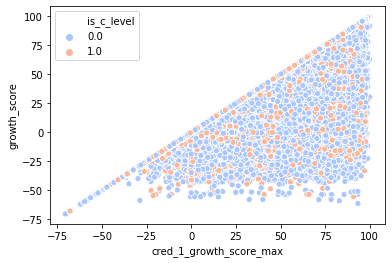

In [89]:
#
sns.scatterplot(x = 'cred_1_growth_score_max', y = 'growth_score', data = features_and_target, palette = 'coolwarm', hue = 'is_c_level')

In [90]:
#Let us also try fit a random forest regressor model on this data to see if we get better results
X.shape

(1545956, 7)

In [91]:
#Bagging using all features
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor

bag_regr1 = RandomForestRegressor(max_features=7, random_state=1)
bag_regr1.fit(X_train, y_train)

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Text(0, 0.5, 'y_test')

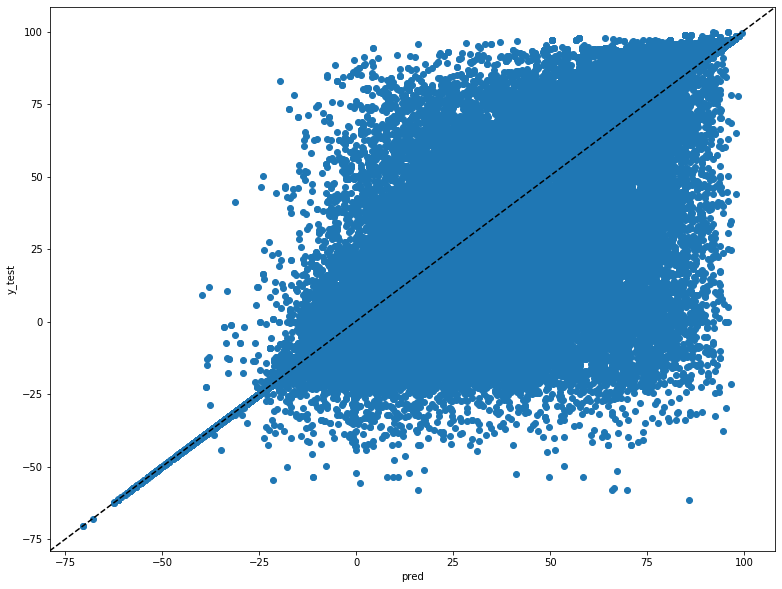

In [92]:
pred = bag_regr1.predict(X_test)

plt.figure(figsize = (13,10))
plt.scatter(pred, y_test)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [93]:
np.sqrt(mean_squared_error(y_test, pred))

8.374168936535595

In [94]:
get_cv_scores(bag_regr1)

CV Mean:  0.8984725971347721
STD:  0.0011544461508664384




In [95]:
#Random forest regressor with 3 features
bag_regr2 = RandomForestRegressor(max_features=3, random_state=1)
bag_regr2.fit(X_train, y_train)

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [96]:
pred_2 = bag_regr2.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred_2))

8.54023434678565

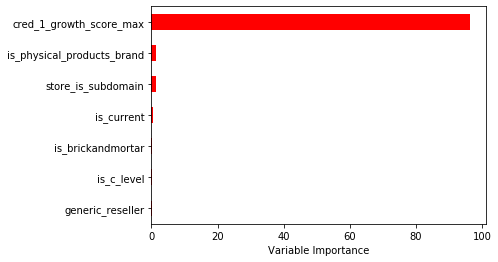

In [98]:
#Visualizing the feature importances for random forest with 3 max features
Importance = pd.DataFrame({'Importance':bag_regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

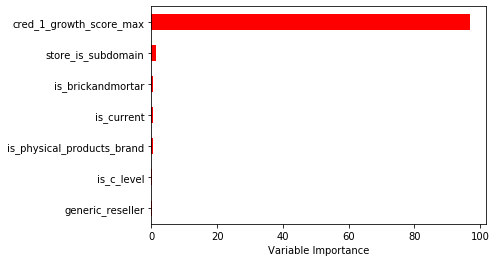

In [99]:
#Visualizing the feature importances for random forest with 7 max features
Importance = pd.DataFrame({'Importance':bag_regr1.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [100]:
#Boosting algorithm to make the predictions
regr_boost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr_boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

generic_reseller               0.000000
is_c_level                     0.017811
is_brickandmortar              0.058711
is_physical_products_brand     0.154554
is_current                     0.407026
store_is_subdomain             1.510721
cred_1_growth_score_max       97.851177
dtype: float64


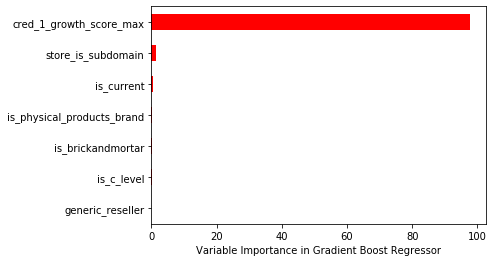

In [101]:
feature_importance = regr_boost.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance in Gradient Boost Regressor')
plt.gca().legend_ = None

In [103]:
pred_boost = regr_boost.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred_boost))

8.708187481389366

In [104]:
get_cv_scores(regr_boost)

CV Mean:  0.8934219370868911
STD:  0.0015977279589886773




In [106]:
print(combined_data['job_title'].nunique())
print(combined_data['job_title'].isnull().sum())

714331
74
